In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)

seed 3
cfg_env cartpole


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2136.9849)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 122814.39326  validloss 143661.28102±0.00000  bestvalidloss 143661.28102  last_update 0
train: iter 1  trainloss 30723.09066  validloss 14395.84054±0.00000  bestvalidloss 14395.84054  last_update 0
train: iter 2  trainloss 2574.40453  validloss 6966.12006±0.00000  bestvalidloss 6966.12006  last_update 0
train: iter 3  trainloss 131245.01732  validloss 107349.97111±0.00000  bestvalidloss 6966.12006  last_update 1
train: iter 4  trainloss 1457.28365  validloss 1225.04236±0.00000  bestvalidloss 1225.04236  last_update 0
train: iter 5  trainloss 1044.71325  validloss 1048.70734±0.00000  bestvalidloss 1048.70734  last_update 0
train: iter 6  trainloss 924.02871  validloss 982.84557±0.00000  bestvalidloss 982.84557  last_update 0
train: iter 7  trainloss 834.45302  validloss 918.61727±0.00000  bestvalidloss 918.61727  last_update 0
train: iter 8  trainloss 770.71648  validloss 873.21448±0.00000  bestvalidloss 873.21448  last_update 0
train: iter 9 

train: iter 77  trainloss -446.82083  validloss -322.59343±0.00000  bestvalidloss -378.80754  last_update 7
train: iter 78  trainloss -453.82183  validloss -364.54456±0.00000  bestvalidloss -378.80754  last_update 8
train: iter 79  trainloss -462.29629  validloss -388.90003±0.00000  bestvalidloss -388.90003  last_update 0
train: iter 80  trainloss -470.93852  validloss -394.62374±0.00000  bestvalidloss -394.62374  last_update 0
train: iter 81  trainloss -461.67605  validloss -430.33666±0.00000  bestvalidloss -430.33666  last_update 0
train: iter 82  trainloss -465.99303  validloss -352.84520±0.00000  bestvalidloss -430.33666  last_update 1
train: iter 83  trainloss -445.11856  validloss -308.89149±0.00000  bestvalidloss -430.33666  last_update 2
train: iter 84  trainloss -468.14633  validloss -369.57024±0.00000  bestvalidloss -430.33666  last_update 3
train: iter 85  trainloss -482.32322  validloss -322.91574±0.00000  bestvalidloss -430.33666  last_update 4
train: iter 86  trainloss -4

train: iter 153  trainloss -762.24658  validloss -733.50786±0.00000  bestvalidloss -854.66317  last_update 6
train: iter 154  trainloss -833.94115  validloss -893.70594±0.00000  bestvalidloss -893.70594  last_update 0
train: iter 155  trainloss -760.57753  validloss -727.44778±0.00000  bestvalidloss -893.70594  last_update 1
train: iter 156  trainloss -818.31673  validloss -931.62704±0.00000  bestvalidloss -931.62704  last_update 0
train: iter 157  trainloss -888.72786  validloss -924.22709±0.00000  bestvalidloss -931.62704  last_update 1
train: iter 158  trainloss -755.83885  validloss -682.99439±0.00000  bestvalidloss -931.62704  last_update 2
train: iter 159  trainloss -865.96686  validloss -828.93019±0.00000  bestvalidloss -931.62704  last_update 3
train: iter 160  trainloss -779.63024  validloss -556.91714±0.00000  bestvalidloss -931.62704  last_update 4
train: iter 161  trainloss -791.78968  validloss -680.85897±0.00000  bestvalidloss -931.62704  last_update 5
train: iter 162  tr

train: iter 228  trainloss -1081.83054  validloss -1058.17499±0.00000  bestvalidloss -1172.90352  last_update 11
train: iter 229  trainloss -1044.34623  validloss -1063.48487±0.00000  bestvalidloss -1172.90352  last_update 12
train: iter 230  trainloss -1054.49597  validloss -965.04837±0.00000  bestvalidloss -1172.90352  last_update 13
train: iter 231  trainloss -1134.54591  validloss -1181.25183±0.00000  bestvalidloss -1181.25183  last_update 0
train: iter 232  trainloss -1110.50973  validloss -1198.08695±0.00000  bestvalidloss -1198.08695  last_update 0
train: iter 233  trainloss -1117.57915  validloss -1168.63073±0.00000  bestvalidloss -1198.08695  last_update 1
train: iter 234  trainloss -1140.00698  validloss -1232.62103±0.00000  bestvalidloss -1232.62103  last_update 0
train: iter 235  trainloss -1095.70413  validloss -1092.51654±0.00000  bestvalidloss -1232.62103  last_update 1
train: iter 236  trainloss -1080.70044  validloss -1139.37848±0.00000  bestvalidloss -1232.62103  last

train: iter 301  trainloss -1178.30771  validloss -1275.65180±0.00000  bestvalidloss -1275.65180  last_update 0
train: iter 302  trainloss -1193.33995  validloss -958.89896±0.00000  bestvalidloss -1275.65180  last_update 1
train: iter 303  trainloss -1204.10903  validloss -1268.59115±0.00000  bestvalidloss -1275.65180  last_update 2
train: iter 304  trainloss -1117.66305  validloss -1303.96318±0.00000  bestvalidloss -1303.96318  last_update 0
train: iter 305  trainloss -1162.03712  validloss -1189.10096±0.00000  bestvalidloss -1303.96318  last_update 1
train: iter 306  trainloss -1204.84647  validloss -1259.87442±0.00000  bestvalidloss -1303.96318  last_update 2
train: iter 307  trainloss -1251.77083  validloss -1302.92373±0.00000  bestvalidloss -1303.96318  last_update 3
train: iter 308  trainloss -1229.95948  validloss -1296.12180±0.00000  bestvalidloss -1303.96318  last_update 4
train: iter 309  trainloss -1161.13178  validloss -1209.78057±0.00000  bestvalidloss -1303.96318  last_up

train: iter 375  trainloss -1072.40381  validloss -1151.11379±0.00000  bestvalidloss -1400.60027  last_update 17
train: iter 376  trainloss -1237.17414  validloss -1205.93766±0.00000  bestvalidloss -1400.60027  last_update 18
train: iter 377  trainloss -1261.96485  validloss -1301.16883±0.00000  bestvalidloss -1400.60027  last_update 19
train: iter 378  trainloss -1145.28899  validloss -1359.29832±0.00000  bestvalidloss -1400.60027  last_update 20
train: iter 379  trainloss -1052.32545  validloss -999.48448±0.00000  bestvalidloss -1400.60027  last_update 21
train: iter 380  trainloss -1234.37563  validloss -1034.90601±0.00000  bestvalidloss -1400.60027  last_update 22
train: iter 381  trainloss -1295.71815  validloss -1277.17575±0.00000  bestvalidloss -1400.60027  last_update 23
train: iter 382  trainloss -1270.29718  validloss -1362.49852±0.00000  bestvalidloss -1400.60027  last_update 24
train: iter 383  trainloss -1256.27791  validloss -1336.20559±0.00000  bestvalidloss -1400.60027 

train: iter 448  trainloss -1367.01749  validloss -1410.60689±0.00000  bestvalidloss -1443.79335  last_update 8
train: iter 449  trainloss -1353.34462  validloss -1382.74521±0.00000  bestvalidloss -1443.79335  last_update 9
train: iter 450  trainloss -1250.42104  validloss -1393.70314±0.00000  bestvalidloss -1443.79335  last_update 10
train: iter 451  trainloss -1318.97110  validloss -1310.46753±0.00000  bestvalidloss -1443.79335  last_update 11
train: iter 452  trainloss -1315.16079  validloss -1395.43244±0.00000  bestvalidloss -1443.79335  last_update 12
train: iter 453  trainloss -1198.76868  validloss -1312.50867±0.00000  bestvalidloss -1443.79335  last_update 13
train: iter 454  trainloss -1361.19566  validloss -1353.19518±0.00000  bestvalidloss -1443.79335  last_update 14
train: iter 455  trainloss -1406.08091  validloss -1402.89812±0.00000  bestvalidloss -1443.79335  last_update 15
train: iter 456  trainloss -1346.11336  validloss -1460.72684±0.00000  bestvalidloss -1460.72684  

train: iter 521  trainloss -1196.16402  validloss -563.40086±0.00000  bestvalidloss -1530.77495  last_update 1
train: iter 522  trainloss -1146.59821  validloss -1128.85526±0.00000  bestvalidloss -1530.77495  last_update 2
train: iter 523  trainloss -1392.23595  validloss -1272.33552±0.00000  bestvalidloss -1530.77495  last_update 3
train: iter 524  trainloss -1111.85876  validloss -1477.64077±0.00000  bestvalidloss -1530.77495  last_update 4
train: iter 525  trainloss -1252.18071  validloss -1262.32534±0.00000  bestvalidloss -1530.77495  last_update 5
train: iter 526  trainloss -1421.50155  validloss -1355.24346±0.00000  bestvalidloss -1530.77495  last_update 6
train: iter 527  trainloss -1438.85168  validloss -1493.20281±0.00000  bestvalidloss -1530.77495  last_update 7
train: iter 528  trainloss -1317.68390  validloss -1493.26059±0.00000  bestvalidloss -1530.77495  last_update 8
train: iter 529  trainloss -1379.84066  validloss -1377.05173±0.00000  bestvalidloss -1530.77495  last_up

train: iter 594  trainloss -1542.56814  validloss -1515.54160±0.00000  bestvalidloss -1585.57137  last_update 47
train: iter 595  trainloss -1523.66306  validloss -1538.39368±0.00000  bestvalidloss -1585.57137  last_update 48
train: iter 596  trainloss -1474.73571  validloss -1553.30098±0.00000  bestvalidloss -1585.57137  last_update 49
train: iter 597  trainloss -1426.08193  validloss -1429.70620±0.00000  bestvalidloss -1585.57137  last_update 50
train: iter 598  trainloss -1535.24904  validloss -1522.55944±0.00000  bestvalidloss -1585.57137  last_update 51
train: iter 599  trainloss -1487.31202  validloss -1571.40982±0.00000  bestvalidloss -1585.57137  last_update 52
train: iter 600  trainloss -1541.22352  validloss -1505.70410±0.00000  bestvalidloss -1585.57137  last_update 53
train: iter 601  trainloss -1523.34209  validloss -1562.40414±0.00000  bestvalidloss -1585.57137  last_update 54
train: iter 602  trainloss -1522.47782  validloss -1504.22989±0.00000  bestvalidloss -1585.57137

train: iter 667  trainloss -1541.49541  validloss -1556.66892±0.00000  bestvalidloss -1601.46101  last_update 30
train: iter 668  trainloss -1527.66329  validloss -1588.79426±0.00000  bestvalidloss -1601.46101  last_update 31
train: iter 669  trainloss -1529.86946  validloss -1527.79509±0.00000  bestvalidloss -1601.46101  last_update 32
train: iter 670  trainloss -1554.74388  validloss -1579.61988±0.00000  bestvalidloss -1601.46101  last_update 33
train: iter 671  trainloss -1536.90933  validloss -1609.88261±0.00000  bestvalidloss -1609.88261  last_update 0
train: iter 672  trainloss -1493.78086  validloss -1551.62336±0.00000  bestvalidloss -1609.88261  last_update 1
train: iter 673  trainloss -1537.05291  validloss -1592.11221±0.00000  bestvalidloss -1609.88261  last_update 2
train: iter 674  trainloss -1574.32523  validloss -1611.20310±0.00000  bestvalidloss -1611.20310  last_update 0
train: iter 675  trainloss -1318.78055  validloss -1438.96723±0.00000  bestvalidloss -1611.20310  la

train: iter 740  trainloss -1554.46037  validloss -1585.34232±0.00000  bestvalidloss -1640.58664  last_update 35
train: iter 741  trainloss -1562.80760  validloss -1554.91017±0.00000  bestvalidloss -1640.58664  last_update 36
train: iter 742  trainloss -1604.38845  validloss -1614.71960±0.00000  bestvalidloss -1640.58664  last_update 37
train: iter 743  trainloss -1546.68413  validloss -1648.06707±0.00000  bestvalidloss -1648.06707  last_update 0
train: iter 744  trainloss -1519.77275  validloss -1545.24978±0.00000  bestvalidloss -1648.06707  last_update 1
train: iter 745  trainloss -1512.01017  validloss -1432.80767±0.00000  bestvalidloss -1648.06707  last_update 2
train: iter 746  trainloss -1523.63340  validloss -1539.37051±0.00000  bestvalidloss -1648.06707  last_update 3
train: iter 747  trainloss -1588.53859  validloss -1637.23518±0.00000  bestvalidloss -1648.06707  last_update 4
train: iter 748  trainloss -1341.10963  validloss -1543.01663±0.00000  bestvalidloss -1648.06707  las

train: iter 813  trainloss -1579.76804  validloss -1635.40555±0.00000  bestvalidloss -1649.73868  last_update 44
train: iter 814  trainloss -1521.81131  validloss -1537.71845±0.00000  bestvalidloss -1649.73868  last_update 45
train: iter 815  trainloss -1579.71302  validloss -1553.24368±0.00000  bestvalidloss -1649.73868  last_update 46
train: iter 816  trainloss -1602.26705  validloss -1624.02044±0.00000  bestvalidloss -1649.73868  last_update 47
train: iter 817  trainloss -1563.88165  validloss -1587.17351±0.00000  bestvalidloss -1649.73868  last_update 48
train: iter 818  trainloss -1361.72940  validloss -1576.40519±0.00000  bestvalidloss -1649.73868  last_update 49
train: iter 819  trainloss -1543.83904  validloss -1248.39805±0.00000  bestvalidloss -1649.73868  last_update 50
train: iter 820  trainloss -1594.10003  validloss -1581.50719±0.00000  bestvalidloss -1649.73868  last_update 51
train: iter 821  trainloss -1573.89971  validloss -1567.67183±0.00000  bestvalidloss -1649.73868

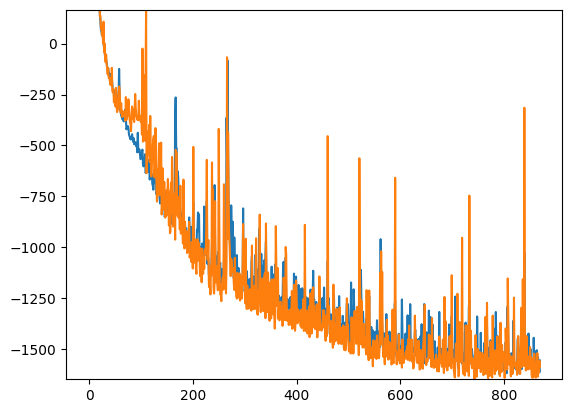

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.90469  validloss 8.31318±0.00000  bestvalidloss 8.31318  last_update 0
train: iter 1  trainloss 7.23241  validloss 7.57375±0.00000  bestvalidloss 7.57375  last_update 0
train: iter 2  trainloss 6.67434  validloss 6.93153±0.00000  bestvalidloss 6.93153  last_update 0
train: iter 3  trainloss 6.20206  validloss 6.43238±0.00000  bestvalidloss 6.43238  last_update 0
train: iter 4  trainloss 5.78550  validloss 5.97870±0.00000  bestvalidloss 5.97870  last_update 0
train: iter 5  trainloss 5.43293  validloss 5.60436±0.00000  bestvalidloss 5.60436  last_update 0
train: iter 6  trainloss 5.11675  validloss 5.26318±0.00000  bestvalidloss 5.26318  last_update 0
train: iter 7  trainloss 4.86207  validloss 4.97277±0.00000  bestvalidloss 4.97277  last_update 0
train: iter 8  trainloss 4.63583  validloss 4.73743±0.00000  bestvalidloss 4.73743  last_update 0
train: iter 9  trainloss 4.41551  validloss 4.53422±0.00000  bestvalidloss 4.53422  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.77942  validloss 0.74748±0.00000  bestvalidloss 0.74748  last_update 0
train: iter 88  trainloss 0.75541  validloss 0.71243±0.00000  bestvalidloss 0.71243  last_update 0
train: iter 89  trainloss 0.71772  validloss 0.66616±0.00000  bestvalidloss 0.66616  last_update 0
train: iter 90  trainloss 0.68688  validloss 0.65195±0.00000  bestvalidloss 0.65195  last_update 0
train: iter 91  trainloss 0.66467  validloss 0.56696±0.00000  bestvalidloss 0.56696  last_update 0
train: iter 92  trainloss 0.63847  validloss 0.60528±0.00000  bestvalidloss 0.56696  last_update 1
train: iter 93  trainloss 0.60394  validloss 0.56852±0.00000  bestvalidloss 0.56696  last_update 2
train: iter 94  trainloss 0.60927  validloss 0.53957±0.00000  bestvalidloss 0.53957  last_update 0
train: iter 95  trainloss 0.55909  validloss 0.54636±0.00000  bestvalidloss 0.53957  last_update 1
train: iter 96  trainloss 0.54131  validloss 0.48657±0.00000  bestvalidloss 0.48657  last_update 0
train: ite

train: iter 174  trainloss 0.34717  validloss 0.16155±0.00000  bestvalidloss 0.10313  last_update 4
train: iter 175  trainloss 0.30557  validloss 0.19422±0.00000  bestvalidloss 0.10313  last_update 5
train: iter 176  trainloss 0.34021  validloss 0.17243±0.00000  bestvalidloss 0.10313  last_update 6
train: iter 177  trainloss 0.31777  validloss 0.18798±0.00000  bestvalidloss 0.10313  last_update 7
train: iter 178  trainloss 0.30740  validloss 0.12094±0.00000  bestvalidloss 0.10313  last_update 8
train: iter 179  trainloss 0.30602  validloss 0.16041±0.00000  bestvalidloss 0.10313  last_update 9
train: iter 180  trainloss 0.28842  validloss 0.11640±0.00000  bestvalidloss 0.10313  last_update 10
train: iter 181  trainloss 0.32483  validloss 0.15993±0.00000  bestvalidloss 0.10313  last_update 11
train: iter 182  trainloss 0.30514  validloss 0.20139±0.00000  bestvalidloss 0.10313  last_update 12
train: iter 183  trainloss 0.29079  validloss 0.14830±0.00000  bestvalidloss 0.10313  last_update

train: iter 259  trainloss 0.30693  validloss 0.16196±0.00000  bestvalidloss 0.10291  last_update 27
train: iter 260  trainloss 0.31067  validloss 0.14048±0.00000  bestvalidloss 0.10291  last_update 28
train: iter 261  trainloss 0.30908  validloss 0.15213±0.00000  bestvalidloss 0.10291  last_update 29
train: iter 262  trainloss 0.30127  validloss 0.14059±0.00000  bestvalidloss 0.10291  last_update 30
train: iter 263  trainloss 0.30614  validloss 0.17883±0.00000  bestvalidloss 0.10291  last_update 31
train: iter 264  trainloss 0.28687  validloss 0.13361±0.00000  bestvalidloss 0.10291  last_update 32
train: iter 265  trainloss 0.32309  validloss 0.11967±0.00000  bestvalidloss 0.10291  last_update 33
train: iter 266  trainloss 0.29795  validloss 0.19071±0.00000  bestvalidloss 0.10291  last_update 34
train: iter 267  trainloss 0.34207  validloss 0.20732±0.00000  bestvalidloss 0.10291  last_update 35
train: iter 268  trainloss 0.33136  validloss 0.20755±0.00000  bestvalidloss 0.10291  last_

train: iter 341  trainloss 0.28528  validloss 0.18499±0.00000  bestvalidloss 0.07869  last_update 72
train: iter 342  trainloss 0.34505  validloss 0.13987±0.00000  bestvalidloss 0.07869  last_update 73
train: iter 343  trainloss 0.31831  validloss 0.17314±0.00000  bestvalidloss 0.07869  last_update 74
train: iter 344  trainloss 0.31725  validloss 0.19507±0.00000  bestvalidloss 0.07869  last_update 75
train: iter 345  trainloss 0.31850  validloss 0.17615±0.00000  bestvalidloss 0.07869  last_update 76
train: iter 346  trainloss 0.32797  validloss 0.15901±0.00000  bestvalidloss 0.07869  last_update 77
train: iter 347  trainloss 0.30564  validloss 0.14424±0.00000  bestvalidloss 0.07869  last_update 78
train: iter 348  trainloss 0.31395  validloss 0.18297±0.00000  bestvalidloss 0.07869  last_update 79
train: iter 349  trainloss 0.30154  validloss 0.15427±0.00000  bestvalidloss 0.07869  last_update 80
train: iter 350  trainloss 0.31073  validloss 0.16095±0.00000  bestvalidloss 0.07869  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.5137, -0.4592, -3.6145, -1.4318], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 65.55991  validloss 77.14583±0.00000  bestvalidloss 77.14583  last_update 0
train: iter 1  trainloss 46.63926  validloss 59.00230±0.00000  bestvalidloss 59.00230  last_update 0
train: iter 2  trainloss 33.07988  validloss 41.25115±0.00000  bestvalidloss 41.25115  last_update 0
train: iter 3  trainloss 24.70533  validloss 30.81574±0.00000  bestvalidloss 30.81574  last_update 0
train: iter 4  trainloss 19.10741  validloss 23.62534±0.00000  bestvalidloss 23.62534  last_update 0
train: iter 5  trainloss 15.39520  validloss 19.07860±0.00000  bestvalidloss 19.07860  last_update 0
train: iter 6  trainloss 12.99627  validloss 16.15208±0.00000  bestvalidloss 16.15208  last_update 0
train: iter 7  trainloss 11.25281  validloss 13.85369±0.00000  bestvalidloss 13.85369  last_update 0
train: iter 8  trainloss 10.02591  validloss 12.15943±0.00000  bestvalidloss 12.15943  last_update 0
train: iter 9  trainloss 9.24129  validloss 11.01096±0.00000  bestvalidloss 11.01096  last_

train: iter 85  trainloss 3.84240  validloss 4.12282±0.00000  bestvalidloss 4.12282  last_update 0
train: iter 86  trainloss 3.84459  validloss 4.25184±0.00000  bestvalidloss 4.12282  last_update 1
train: iter 87  trainloss 3.83298  validloss 4.19409±0.00000  bestvalidloss 4.12282  last_update 2
train: iter 88  trainloss 3.83808  validloss 4.32926±0.00000  bestvalidloss 4.12282  last_update 3
train: iter 89  trainloss 3.84305  validloss 4.35409±0.00000  bestvalidloss 4.12282  last_update 4
train: iter 90  trainloss 3.83370  validloss 4.24336±0.00000  bestvalidloss 4.12282  last_update 5
train: iter 91  trainloss 3.80221  validloss 4.25989±0.00000  bestvalidloss 4.12282  last_update 6
train: iter 92  trainloss 3.82754  validloss 4.17524±0.00000  bestvalidloss 4.12282  last_update 7
train: iter 93  trainloss 3.80434  validloss 4.26055±0.00000  bestvalidloss 4.12282  last_update 8
train: iter 94  trainloss 3.83742  validloss 4.24571±0.00000  bestvalidloss 4.12282  last_update 9
train: ite

train: iter 168  trainloss 3.71498  validloss 4.35878±0.00000  bestvalidloss 4.10789  last_update 53
train: iter 169  trainloss 3.69092  validloss 4.34727±0.00000  bestvalidloss 4.10789  last_update 54
train: iter 170  trainloss 3.66461  validloss 4.29274±0.00000  bestvalidloss 4.10789  last_update 55
train: iter 171  trainloss 3.69109  validloss 4.32520±0.00000  bestvalidloss 4.10789  last_update 56
train: iter 172  trainloss 3.67333  validloss 4.31415±0.00000  bestvalidloss 4.10789  last_update 57
train: iter 173  trainloss 3.69520  validloss 4.36454±0.00000  bestvalidloss 4.10789  last_update 58
train: iter 174  trainloss 3.65707  validloss 4.28352±0.00000  bestvalidloss 4.10789  last_update 59
train: iter 175  trainloss 3.62091  validloss 4.40976±0.00000  bestvalidloss 4.10789  last_update 60
train: iter 176  trainloss 3.65769  validloss 4.29303±0.00000  bestvalidloss 4.10789  last_update 61
train: iter 177  trainloss 3.67958  validloss 4.34913±0.00000  bestvalidloss 4.10789  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-9.0191)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.3334)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.6626457511554824
tensor([0.1972])
